# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [105]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

import matplotlib as plt
import seaborn as sns
import pandas as pd

In [115]:
retaildf = pd.read_excel("/Users/burnesbrown1/Documents/Coding Temple/Coding_Temple_Two/Week4/day3/Online Retail.xlsx")


In [116]:
retaildf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [117]:
retaildf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [119]:
retaildf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [120]:
retaildf.columns = retaildf.columns.str.lower().str.replace(" ", "_")

In [121]:
new_retaildf0 = retaildf.drop(columns= ['invoicedate'])
new_retaildf1 = new_retaildf0.drop(columns= ['country'])
new_retaildf2 = new_retaildf1.drop(columns= ['description'])
new_retaildf3 = new_retaildf2.drop(columns= ['stockcode'])
new_retaildf4 = new_retaildf3.drop(columns= ['customerid'])
new_retaildf5 = new_retaildf4.drop(columns= ['invoiceno'])


In [122]:
new_retaildf5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   quantity   541909 non-null  int64  
 1   unitprice  541909 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.3 MB


In [123]:
new_retaildf5.isnull().sum()
#print('Number of null values:', null_count)

quantity     0
unitprice    0
dtype: int64

In [124]:
new_retaildf5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   quantity   541909 non-null  int64  
 1   unitprice  541909 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.3 MB


In [125]:
corr= new_retaildf5.corr(numeric_only = True)

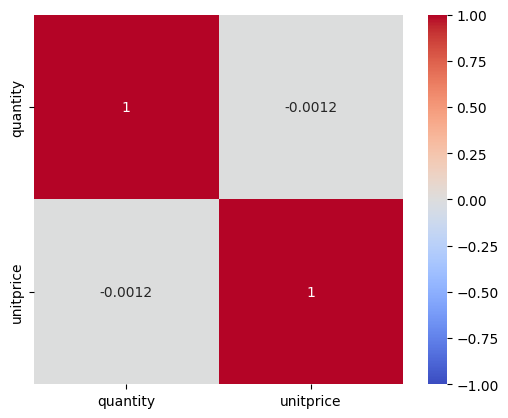

In [126]:
sns.heatmap(corr,
    square = True,
    cmap = "coolwarm",
    annot = True,
    vmax = 1,
    vmin = -1);

In [127]:
new_retaildf5.head()

,quantity,unitprice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


In [128]:
new_retaildf5.describe()

,quantity,unitprice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [94]:
#clean_retaildf = pd.get_dummies(new_retaildf5, columns= ["stockcode"] )
#clean_retaildf = pd.get_dummies(new_retaildf5, columns= ["invoiceno"] )

KeyError: "None of [Index(['stockcode'], dtype='object')] are in the [columns]"

In [130]:
new_retaildf5.head()

,quantity,unitprice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Columns: 4074 entries, invoiceno to stockcode_m
dtypes: bool(4070), float64(2), int64(1), object(1)
memory usage: 2.1+ GB


In [ ]:
#ordinal encoding 

In [135]:
#target = string name of column
target = "unitprice"
# separate the target vector from the feature matrix
#cardinaltiy = large number of unique values
#constant column = single value ex state for properties in chicago
X = new_retaildf5.drop(columns=[target])
y=new_retaildf5[target]

#split data into training and testing set utilizing sklearn
X_train,X_test,y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)
display(X_test)
print(y_test)
#assert len(x_train) + len(x_test) == len(x), "you messed up your split"



,quantity
209268,24
207108,4
167085,4
471836,3
115865,2
...,...
316739,2
404752,40
261850,8
530124,24


209268    0.85
207108    6.95
167085    0.65
471836    1.95
115865    9.95
          ... 
316739    0.83
404752    8.50
261850    1.65
530124    0.19
312160    0.39
Name: unitprice, Length: 108382, dtype: float64


In [136]:
baseline = [new_retaildf5.unitprice.mean()] * len(y_train)
baseline

[4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,
 4.611113626088513,


In [ ]:
#ohe = OneHotEncoder(use_cat_names=True)



In [ ]:
#ohe.fit(x_train, y_train)

In [137]:
# Step 1: Instantiate our Encoder
#ohe = OneHotEncoder(use_cat_names=True)

# # Step 2: Fit the Encoder
# 

# # Step 3: Transform our data
# x_trans = ohe.transform(x_train)

display(X_test)
print(y_test)

X_test.info()
y_test.info()





,quantity
209268,24
207108,4
167085,4
471836,3
115865,2
...,...
316739,2
404752,40
261850,8
530124,24


209268    0.85
207108    6.95
167085    0.65
471836    1.95
115865    9.95
          ... 
316739    0.83
404752    8.50
261850    1.65
530124    0.19
312160    0.39
Name: unitprice, Length: 108382, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 108382 entries, 209268 to 312160
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   quantity  108382 non-null  int64
dtypes: int64(1)
memory usage: 1.7 MB
<class 'pandas.core.series.Series'>
Index: 108382 entries, 209268 to 312160
Series name: unitprice
Non-Null Count   Dtype  
--------------   -----  
108382 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [138]:
new_retaildf5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   quantity   541909 non-null  int64  
 1   unitprice  541909 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 8.3 MB


In [139]:
new_retaildf5.select_dtypes("O")

""
0
1
2
3
4
...
541904
541905
541906
541907


In [140]:
new_retaildf5.head()

,quantity,unitprice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


In [141]:
# # Step 4: Instantiate the model object
# model_dt = LinearRegression()
model_lr = LinearRegression()
# # Step 5: Fit the model object
# model_dt.fit(x_train, y_train)
model_lr.fit(X_train, y_train)



LinearRegression()

In [146]:
#score testing

new_retaildf5_r_sq = model_lr.score(X, y)
print(new_retaildf5_r_sq)

9.053140186399133e-07


There is no correlation between unit price and qty sold and the model does not predict better than the baseline. 